In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from zipfile import ZipFile

zip_file = ZipFile('../input/the-winton-stock-market-challenge/train.csv.zip')
df = pd.read_csv(zip_file.open('train.csv'))
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_175,Ret_176,Ret_177,Ret_178,Ret_179,Ret_180,Ret_PlusOne,Ret_PlusTwo,Weight_Intraday,Weight_Daily
0,1,NaN,NaN,NaN,NaN,8.0,NaN,75751,0.2254,11.0,...,-0.002688,0.002246,-0.000838,-6.953224e-04,0.000003,-0.001974,-0.019512,0.028846,1.251508e+06,1.564385e+06
1,2,NaN,NaN,NaN,NaN,3.0,0.388896,17369,0.0166,13.0,...,-0.000129,0.000123,0.000248,3.315418e-07,0.000003,0.000027,-0.002939,-0.010253,1.733950e+06,2.167438e+06
2,3,NaN,-0.696727,0.739591,-0.167928,9.0,0.471947,8277,0.3650,9.0,...,-0.000524,-0.000394,0.000116,5.322557e-04,0.000274,0.000784,-0.024791,0.015711,1.529197e+06,1.911497e+06
3,4,NaN,-0.694350,1.568248,0.479073,5.0,0.120653,22508,0.2654,13.0,...,0.000346,-0.000090,0.000288,-1.281102e-04,0.000074,0.000341,-0.005680,-0.002190,1.711569e+06,2.139462e+06
4,5,6.0,-1.736489,2.765531,1.245280,7.0,4.866985,22423,0.2138,13.0,...,-0.001235,0.000027,0.002449,8.619882e-06,0.001209,-0.000004,0.036104,-0.026552,1.267270e+06,1.584088e+06


In [2]:
zip_file = ZipFile('../input/the-winton-stock-market-challenge/test_2.csv.zip')
new_df = pd.read_csv(zip_file.open('test_2.csv'))
new_df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Ret_111,Ret_112,Ret_113,Ret_114,Ret_115,Ret_116,Ret_117,Ret_118,Ret_119,Ret_120
0,1,1.0,1.412783,-0.056284,NaN,10.0,0.413226,18871,0.2138,11.0,...,0.000370,-0.000762,NaN,0.000366,-0.002444,-0.001301,-0.000917,0.000762,-0.000556,0.000759
1,2,NaN,NaN,0.907973,1.002425,7.0,-0.257825,5852,0.2138,13.0,...,0.000457,0.000003,-0.000007,-0.000003,-0.000012,-0.000463,-0.000003,-0.000002,0.000468,-0.000012
2,3,NaN,-0.607583,1.076668,0.517865,5.0,0.947340,76935,0.0105,10.0,...,0.000003,0.000157,-0.000181,0.000003,NaN,0.000164,0.000353,0.000704,-0.000168,-0.000006
3,4,NaN,2.230240,0.223222,NaN,1.0,NaN,84573,0.3318,13.0,...,0.000010,-0.000792,-0.000479,0.000017,0.000170,-0.001079,0.000320,0.000006,0.001392,-0.001850
4,5,NaN,0.360399,0.597896,-0.145497,10.0,0.275744,89615,0.0099,8.0,...,0.000447,0.000489,-0.000233,-0.000495,0.000057,-0.000050,-0.000011,-0.000377,0.000227,-0.000114


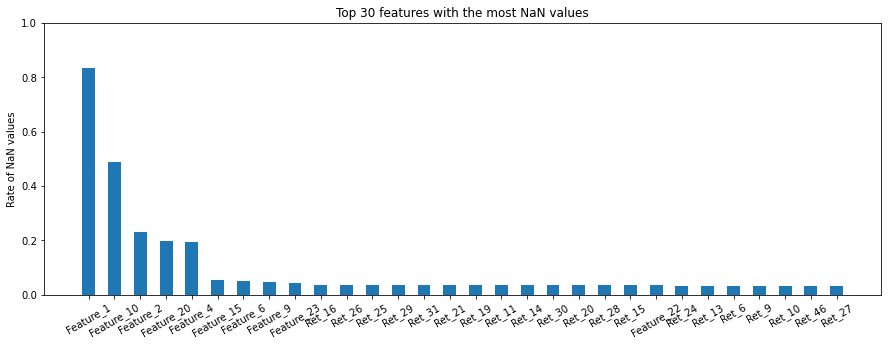

In [3]:
fig, ax = plt.subplots(figsize = (15, 5))
df_na = (df.isnull().sum() / len(df))
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending = False)[: 30]
ax.bar(range(df_na.size), df_na, width = 0.5)
plt.xticks(range(df_na.size), df_na.index, rotation = 30)
plt.ylim([0, 1])
plt.title('Top 30 features with the most NaN values')
plt.ylabel('Rate of NaN values')
plt.show()

In [4]:
ret = df.loc[:, 'Ret_2':'Ret_120'].sum(1)
new_ret = new_df.loc[:, 'Ret_2':'Ret_120'].sum(1)

X = np.hstack((df.loc[:, 'Feature_1':'Ret_MinusOne'].values, ret.values[:, np.newaxis]))
ts = df.loc[:, 'Ret_2':'Ret_120'].values
y = df.loc[:, 'Ret_PlusOne':'Ret_PlusTwo'].values
y_ts = df.loc[:, 'Ret_121':'Ret_180'].values

new_X = np.hstack((new_df.loc[:, 'Feature_1':'Ret_MinusOne'].values, new_ret.values[:, np.newaxis]))
new_ts = new_df.loc[:, 'Ret_2':'Ret_120'].values

In [5]:
from sklearn.impute import SimpleImputer

imr = SimpleImputer(strategy = 'mean')
X = imr.fit_transform(X)
new_X = imr.transform(new_X)

ts = imr.fit_transform(ts)
new_ts = imr.transform(new_ts)

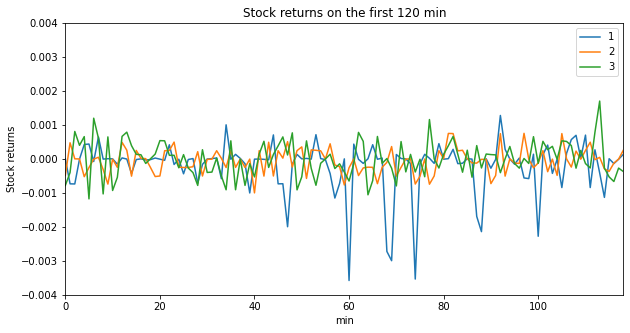

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.plot(ts[0, :], label = '1')
plt.plot(ts[1, :], label = '2')
plt.plot(ts[2, :], label = '3')
plt.ylim([-0.004, 0.004])
plt.xlim([0, 118])
plt.ylabel('Stock returns')
plt.xlabel('min')
plt.title('Stock returns on the first 120 min')
plt.legend()
plt.show()

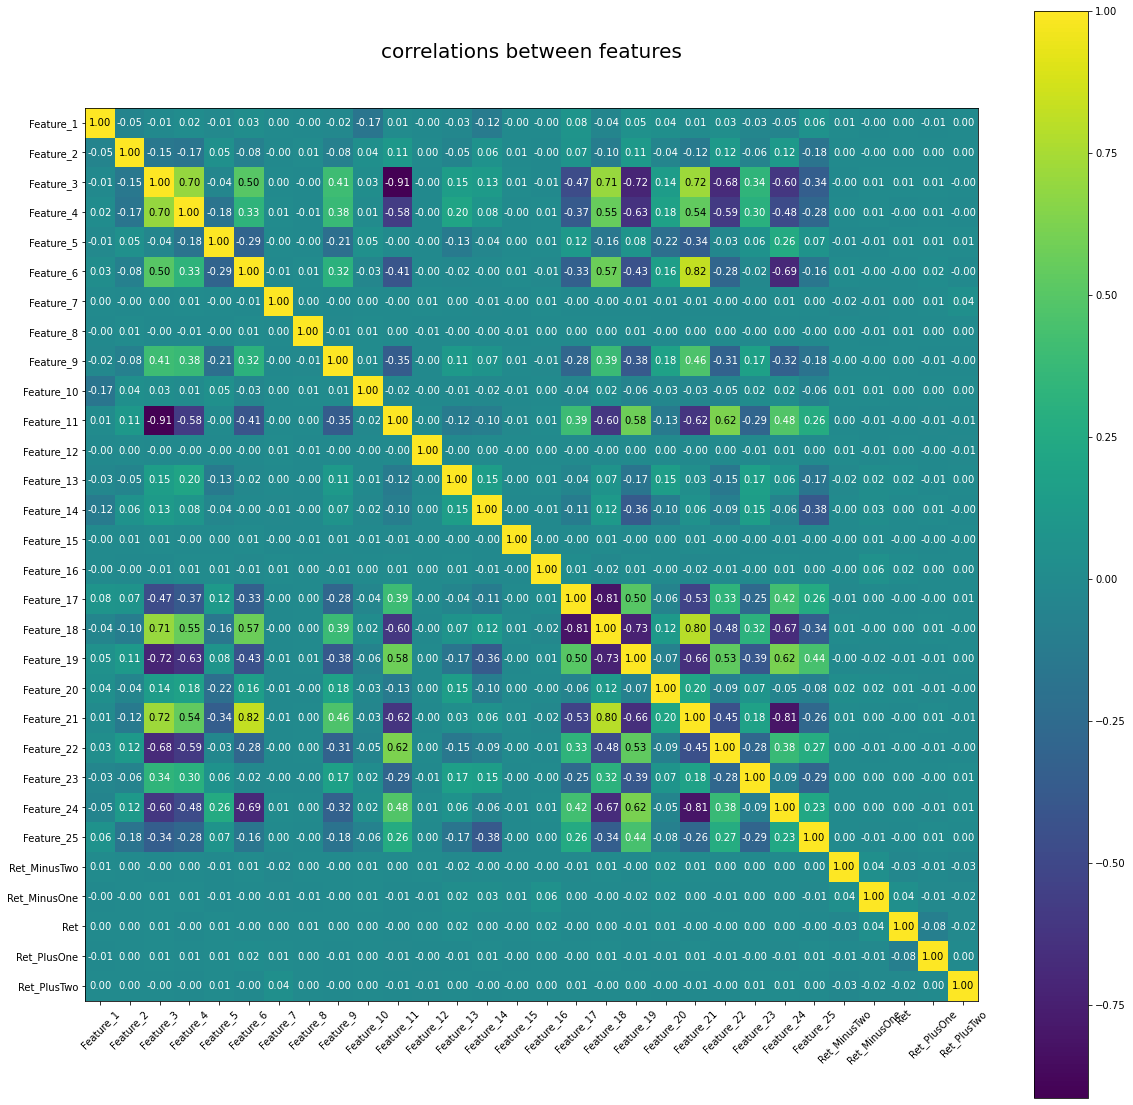

In [7]:
from mlxtend.plotting import heatmap

cm = np.corrcoef(np.hstack([X, y]).T)
cols = list(df.columns[1:28]) + ['Ret', 'Ret_PlusOne', 'Ret_PlusTwo']
hm = heatmap(cm, row_names = cols, column_names = cols, figsize = (20, 20))
plt.title('correlations between features', fontsize = 20)
plt.show()

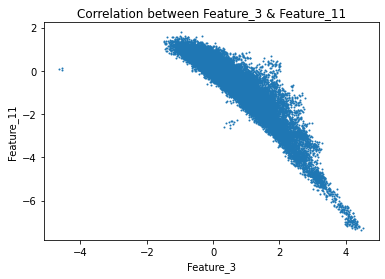

In [8]:
plt.scatter(df['Feature_3'], df['Feature_11'], marker = 'o', s = 1) #, linewidth = 1, edgecolor = 'black')
plt.title('Correlation between Feature_3 & Feature_11')
plt.xlabel('Feature_3')
plt.ylabel('Feature_11')
plt.show()

In [9]:
X_train = X[:30000, :]
X_val = X[30000:35000, :]
X_test = X[35000:, :]
y_train = y[:30000, :]
y_val = y[30000:35000, :]
y_test = y[35000:, :]
X_train_val = X[:35000, :]
y_train_val = y[:35000, :]

In [10]:
y1_train = y_train[:, 0]
y2_train = y_train[:, 1]
y1_val = y_val[:, 0]
y2_val = y_val[:, 1]
y1_test = y_test[:, 0]
y2_test = y_test[:, 1]
y1_train_val = y_train_val[:, 0]
y2_train_val = y_train_val[:, 1]
y1 = y[:, 0]
y2 = y[:, 1]

In [11]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label = y1_train)

param = { 'verbosity': 0,
          'objective': 'reg:pseudohubererror',
          'eval_metric': 'mae',
          'subsample': 0.8,
          'colsample_bytree': 0.8,
          'tree_method': 'gpu_hist',
          'eta': 0.1,
          'max_depth': 3,
          'gamma': 0,
          'min_child_weight': 1 }

bst = xgb.cv(param, dtrain, nfold = 5, num_boost_round = 1000, early_stopping_rounds = 50)

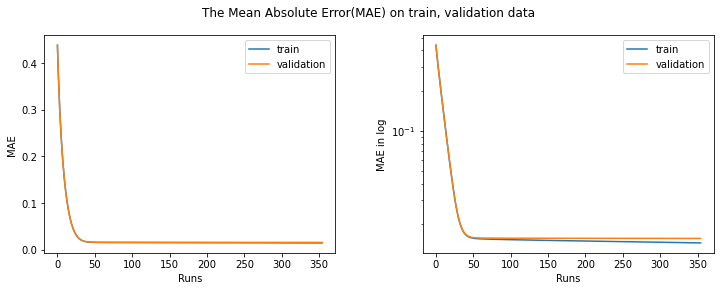

In [12]:
fig = plt.figure(figsize = (12, 4))
fig.suptitle('The Mean Absolute Error(MAE) on train, validation data')
plt.subplot(121)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.xlabel('Runs')
plt.ylabel('MAE')
plt.legend()
plt.subplot(122)
plt.plot(bst['train-mae-mean'], label = 'train')
plt.plot(bst['test-mae-mean'], label = 'validation')
plt.yscale('log')
plt.xlabel('Runs')
plt.ylabel('MAE in log')
plt.legend()
plt.subplots_adjust(wspace = 0.3)
plt.show()

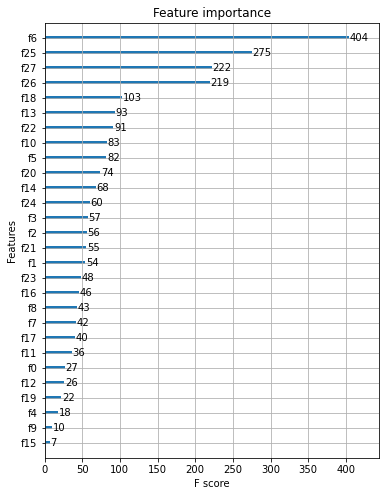

In [13]:
xgb_med = xgb.train(param, dtrain, num_boost_round = bst.shape[0])

fig, ax = plt.subplots(figsize = (6, 8))
xgb.plot_importance(xgb_med, ax = ax)
plt.show()

In [14]:
select = [1, 5, 6, 13, 14, 18, 22, 25, 26, 27]

X_train = X[:30000, select]
X_val = X[30000:35000, select]
X_test = X[35000:, select]
X_train_val = X[:35000, select]

In [15]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

def mysearch(X_train, y_train, X_val, y_val, param, param1, param2 = None, estimator = XGBRegressor, score = mean_absolute_error):
    best_score = 10000000.
    best_param = { **param }
    para = { **param }
    key1 = list(param1.keys())[0]
    if param2 is not None:
        key2 = list(param2.keys())[0]
        for parama in param1[key1]:
            for paramb in param2[key2]:
                para[key1] = parama
                para[key2] = paramb
                est = estimator(**para)
                est.fit(X_train, y_train)
                y_pred = est.predict(X_val)
                current_score = score(y_pred, y_val)
                print('The current score: ', current_score)
                print('The current parameter: {} = {}, {} = {}'.format(key1, parama, key2, paramb))
                if (current_score < best_score):
                    best_score = current_score
                    best_param[key1] = parama
                    best_param[key2] = paramb
        print('The best score: ', best_score)
        print('The best parameter: {} = {}, {} = {}'.format(key1, best_param[key1], key2, best_param[key2]))
    else:
        for parama in param1[key1]:
            para[key1] = parama
            est = estimator(**para)
            est.fit(X_train, y_train)
            y_pred = est.predict(X_val)
            current_score = score(y_pred, y_val)
            print('The current score: ', current_score)
            print('The current parameter: {} = {}'.format(key1, parama))
            if (current_score < best_score):
                best_score = current_score
                best_param[key1] = parama
        print('The best score: ', best_score)
        print('The best parameter: {} = {}'.format(key1, best_param[key1]))
    return best_score, best_param

In [16]:
param = {'learning_rate': 0.1,
         'verbosity': 0,
         'objective': 'reg:pseudohubererror',
         'tree_method': 'gpu_hist',
         'n_estimators': 100,
         'n_jobs': -1,
         'gamma': 0,
         'subsample': 0.8,
         'colsample_bytree': 0.8,
         'alpha': 0}
param1 = { 'max_depth': [1, 3] }
param2 = { 'min_child_weight': [1, 3] }
score, bst_param = mysearch(X_train, y1_train, X_val, y1_val, param, param1, param2)
print('The best score is:', score)
print('The best parameter is:', bst_param)

The current score:  0.015442025893983663
The current parameter: max_depth = 1, min_child_weight = 1
The current score:  0.015437952214246712
The current parameter: max_depth = 1, min_child_weight = 3
The current score:  0.015155153446146867
The current parameter: max_depth = 3, min_child_weight = 1
The current score:  0.015151408234325299
The current parameter: max_depth = 3, min_child_weight = 3
The best score:  0.015151408234325299
The best parameter: max_depth = 3, min_child_weight = 3
The best score is: 0.015151408234325299
The best parameter is: {'learning_rate': 0.1, 'verbosity': 0, 'objective': 'reg:pseudohubererror', 'tree_method': 'gpu_hist', 'n_estimators': 100, 'n_jobs': -1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'alpha': 0, 'max_depth': 3, 'min_child_weight': 3}


In [17]:
best_xgbr = XGBRegressor( objective = 'reg:pseudohubererror',
                          tree_method = 'gpu_hist',
                          max_depth = 5,
                          min_child_weight = 3,
                          gamma = 0,
                          subsample = 0.9,
                          colsample_bytree = 0.9,
                          alpha = 0,
                          learning_rate = 0.01,
                          n_estimators = 700)

In [18]:
best_xgbr.fit(X_train_val, y1_train_val)
y1_test_pred = best_xgbr.predict(X_test)

best_xgbr.fit(X_train_val, y2_train_val)
y2_test_pred = best_xgbr.predict(X_test)

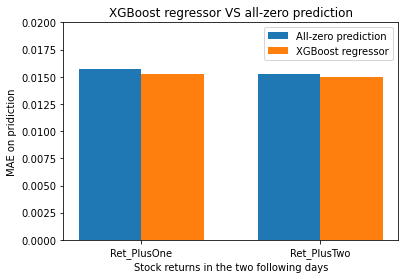

In [19]:
from sklearn.metrics import mean_absolute_error

benchmark = [np.abs(y1_test).mean(), np.abs(y2_test).mean()]
fitted = [mean_absolute_error(y1_test_pred, y_test[:, 0]), mean_absolute_error(y2_test_pred, y_test[:, 1])]

index = np.arange(2)
bar_width = 0.35
plt.bar(index, benchmark, bar_width, label = 'All-zero prediction')
plt.bar(index + bar_width, fitted, bar_width, label = 'XGBoost regressor')
plt.xticks(index + bar_width / 2, ['Ret_PlusOne', 'Ret_PlusTwo'])
plt.title('XGBoost regressor VS all-zero prediction')
plt.xlabel('Stock returns in the two following days')
plt.ylabel('MAE on pridiction')
plt.ylim([0, 0.02])
plt.legend()
plt.show()

In [20]:
best_xgbr.fit(X[:, select], y[:, 0])
y1_new_pred = best_xgbr.predict(new_X[:, select])

best_xgbr.fit(X[:, select], y[:, 1])
y2_new_pred = best_xgbr.predict(new_X[:, select])

In [21]:
y1_new_pred = 0.1 * y1_new_pred + 0.9 * np.median(y[:, 0])
y2_new_pred = 0.1 * y2_new_pred + 0.9 * np.median(y[:, 1])

ts_new_pred = np.zeros((new_X.shape[0], 60))

zip_file = ZipFile('../input/the-winton-stock-market-challenge/sample_submission_2.csv.zip')
sub = pd.read_csv(zip_file.open('sample_submission_2.csv'))
sub['Predicted'] = np.hstack([ts_new_pred, y1_new_pred[:, np.newaxis], np.median(y[:, 1])* np.ones((new_X.shape[0], 1))]).flatten()
sub.to_csv('submission.csv', index = False)